In [ ]:
#Download the training and validation data.
############ TRAINING DATA ##################
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
############ VALIDATION DATA ################
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


--2023-03-05 06:40:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  23.0MB/s    in 7.2s    

2023-03-05 06:40:32 (19.9 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2023-03-05 06:40:32--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M)

In [ ]:
#Lets Unpack the downloaded files
import zipfile
trainDirection = './horse-or-human.zip'
validationDirection = './validation-horse-or-human.zip'
unTrainDirection = zipfile.ZipFile(trainDirection, 'r')
unValidationDirection  = zipfile.ZipFile(validationDirection, 'r')
unTrainDirection.extractall('./trainData')
unValidationDirection.extractall('./validationData')
unTrainDirection.close()
unValidationDirection.close()

In [ ]:
#now it's time to split local directions to variables and use them
#we need OS here to do this
import os
trainHorse  = os.path.join('./trainData/horses')
trainHuman  = os.path.join('./trainData/humans')
validHorse  = os.path.join('./validationData/horses')
validHuman  = os.path.join('./validationData/humans')


In [ ]:
trainHorse_element = os.listdir(trainHorse)
trainHuman_element = os.listdir(trainHuman)
validHorse_element = os.listdir(validHorse)
validHuman_element = os.listdir(validHuman)
print(trainHorse_element[:5],"\n",  trainHuman_element[:5],"\n", validHorse_element[:5],"\n", validHuman_element[:5])

['horse17-3.png', 'horse10-6.png', 'horse46-3.png', 'horse23-7.png', 'horse35-5.png'] 
 ['human09-08.png', 'human07-30.png', 'human05-19.png', 'human07-11.png', 'human06-06.png'] 
 ['horse1-127.png', 'horse1-539.png', 'horse5-303.png', 'horse4-043.png', 'horse5-519.png'] 
 ['valhuman04-03.png', 'valhuman02-04.png', 'valhuman03-24.png', 'valhuman01-06.png', 'valhuman02-11.png']


In [ ]:
print("Total Number of training data is", len(trainHorse_element + trainHuman_element))
print("Total Number of validation data is", len(validHorse_element + validHuman_element))

Total Number of training data is 1027
Total Number of validation data is 256


<function matplotlib.pyplot.show(close=None, block=None)>

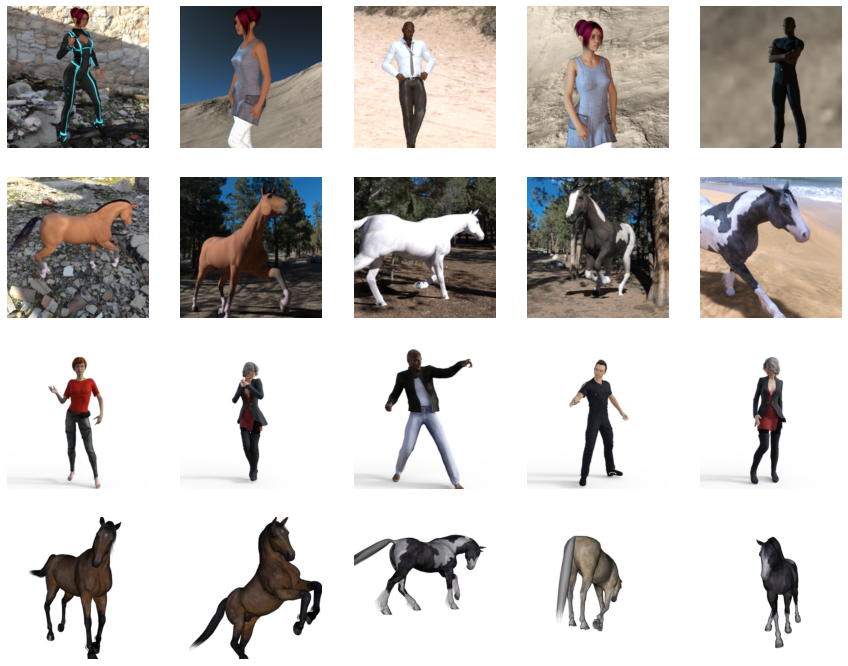

In [ ]:
#as you know for plotting an image that is hidden behind an address we need to use
#matplot image too. --------- ok then:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
plt.figure(figsize=(15, 12))
plt.title("SAMPLE IMAGES FROM DATASET")
temp_index = 0
humanPreviewT = [os.path.join(trainHuman, element) for element in
                 trainHuman_element[temp_index:temp_index+5]]
humanPreviewV = [os.path.join(validHuman, element) for element in
                 validHuman_element[temp_index:temp_index+5]]
horsePreviewT = [os.path.join(trainHorse, element) for element in
                 trainHorse_element[temp_index:temp_index+5]]
horsePreviewV = [os.path.join(validHorse, element) for element in
                 validHorse_element[temp_index:temp_index+5]]
for i, temp_path in enumerate(humanPreviewT +
                              horsePreviewT +
                              humanPreviewV +
                              horsePreviewV ):
  plt.subplot(4, 5 , i+1)
  plt.grid(False)
  preview = mpimg.imread(temp_path)
  plt.imshow(preview)
  plt.axis('Off')
plt.show

In [ ]:
#OK everything is ok and now we can creat a model
#for creating the model the tensorflow library is required---- then:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')])

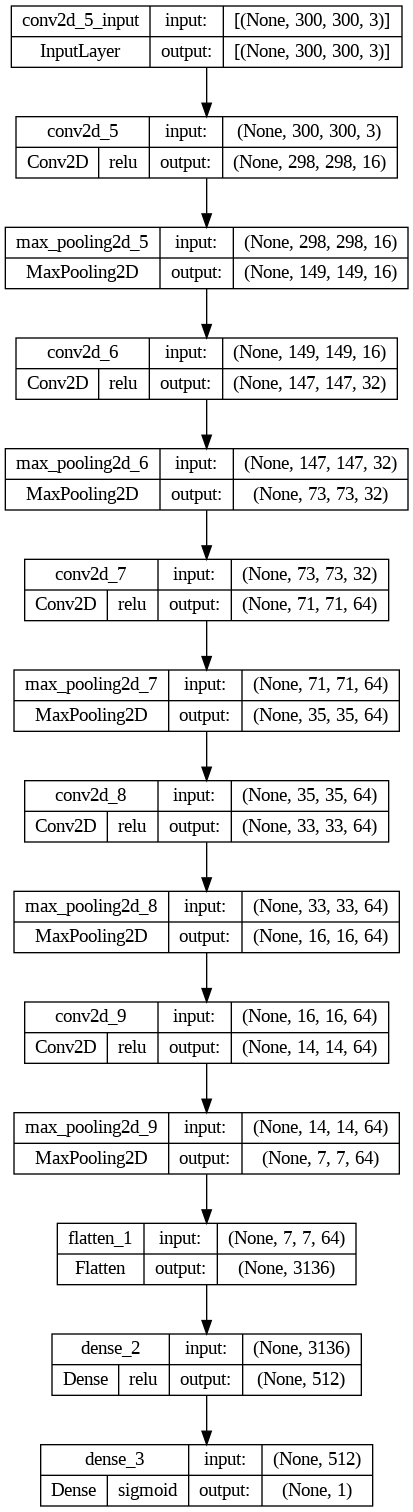

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, show_layer_activations= True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001) , loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
#model compilation is DONE but we need labeled data to pass into training fit
#function but we just have some pictures with no label for this purpose we need
#work with imageDataGenerator from tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
dataForTrainGenerator = idg(rescale = 1/255)
dataForTrain = dataForTrainGenerator.flow_from_directory('./trainData',
                                                         target_size=(300, 300),
                                                         batch_size = 64,
                                                         class_mode = "binary")
dataForValidationGenerator = idg(rescale = 1/255)
dataForValidation = dataForValidationGenerator.flow_from_directory('./validationData',
                                                                   target_size = (300,300),
                                                                   batch_size = 64,
                                                                   class_mode = "binary" )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
 model.fit(dataForTrain, epochs = 16, steps_per_epoch = 8,
                 validation_data = dataForValidation)

Epoch 1/16
8/8 [==============================] - 5s 628ms/step - loss: 0.0158 - accuracy: 0.9933 - val_loss: 1.7931 - val_accuracy: 0.8281
Epoch 2/16
8/8 [==============================] - 6s 752ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 2.1156 - val_accuracy: 0.8125
Epoch 3/16
8/8 [==============================] - 5s 633ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.2563 - val_accuracy: 0.8438
Epoch 4/16
8/8 [==============================] - 6s 711ms/step - loss: 2.5755 - accuracy: 0.9313 - val_loss: 0.9760 - val_accuracy: 0.8086
Epoch 5/16
8/8 [==============================] - 5s 591ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 1.1876 - val_accuracy: 0.8203
Epoch 6/16
8/8 [==============================] - 6s 765ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.4274 - val_accuracy: 0.8203
Epoch 7/16
8/8 [==============================] - 5s 645ms/step - loss: 0.0089 - accuracy: 0.9961 - val_loss: 2.0621 - val_accuracy: 0.7891
Epoch 8/16
8/8 [====

In [ ]:
hist = model.history

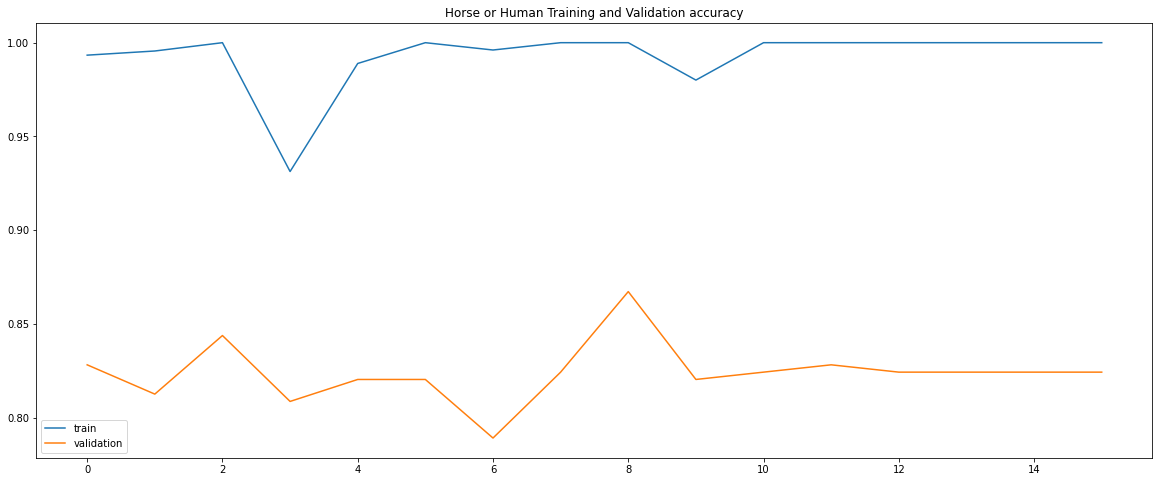

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Horse or Human Training and Validation accuracy')
plt.plot(hist.history["accuracy"], label = "train")
plt.plot(hist.history["val_accuracy"], label = "validation")
plt.legend()
plt.xlabel = "Epochs"
plt.ylabel = "Accuracy"
plt.show()
